# Рекомендация тарифов

В вашем распоряжении данные о поведении клиентов, которые уже перешли на эти тарифы (из проекта курса «Статистический анализ данных»). Нужно построить модель для задачи классификации, которая выберет подходящий тариф. Предобработка данных не понадобится — вы её уже сделали.

Постройте модель с максимально большим значением *accuracy*. Чтобы сдать проект успешно, нужно довести долю правильных ответов по крайней мере до 0.75. Проверьте *accuracy* на тестовой выборке самостоятельно.

# Описание данных

Каждый объект в наборе данных — это информация о поведении одного пользователя за месяц. Известно:

* сalls — количество звонков,
* minutes — суммарная длительность звонков в минутах,
* messages — количество sms-сообщений,
* mb_used — израсходованный интернет-трафик в Мб,
* is_ultra — каким тарифом пользовался в течение месяца («Ультра» — 1, «Смарт» — 0).

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
import seaborn as sns

## Откройте и изучите файл

In [2]:
df = pd.read_csv('/content/users_behavior.csv')
df.head()

,calls,minutes,messages,mb_used,is_ultra
0,40.0,311.90,83.0,19915.42,0
1,85.0,516.75,56.0,22696.96,0
2,77.0,467.66,86.0,21060.45,0
3,106.0,745.53,81.0,8437.39,1
4,66.0,418.74,1.0,14502.75,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3214 entries, 0 to 3213
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   calls     3214 non-null   float64
 1   minutes   3214 non-null   float64
 2   messages  3214 non-null   float64
 3   mb_used   3214 non-null   float64
 4   is_ultra  3214 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 125.7 KB


In [4]:
df.isna().mean()

calls       0.0
minutes     0.0
messages    0.0
mb_used     0.0
is_ultra    0.0
dtype: float64

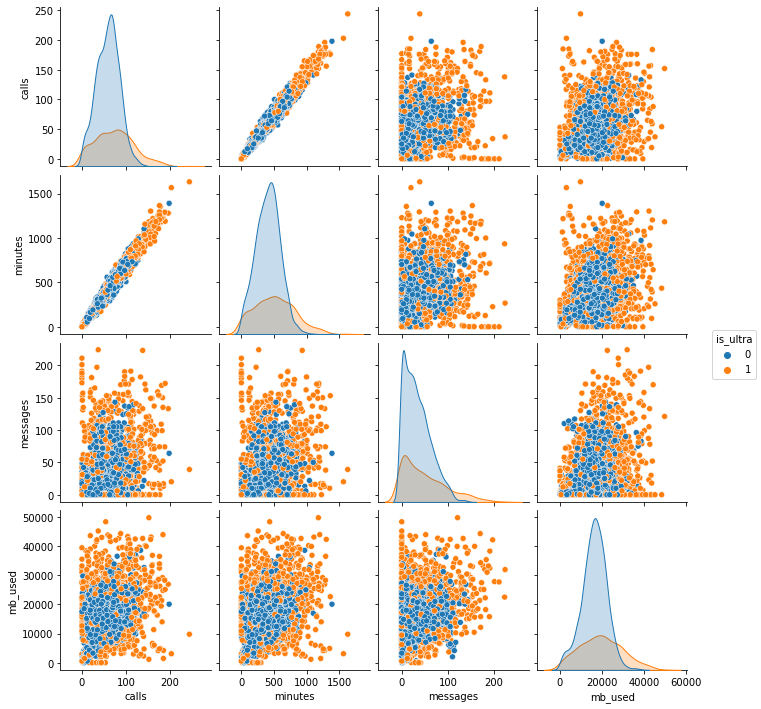

In [27]:
ax = sns.pairplot(df, hue='is_ultra')
sns.move_legend(ax, "center right")

Данные уже обработаны и готовые, так что можем приступить к обучению.

## Разбейте данные на выборки

Для корректного обучения разобьем дата сет на 3 выборки - обучающую, валидационную и тестовую.

С начало отделим 60% данных это будет обучающая выборка. Остальные поделим попалам - на валидационную и тестовую.
Таким образом у нас получиться соотношение  60\20\20

In [6]:
df_user_train, df_user_r = train_test_split(df, test_size=0.4, random_state=1111)

In [7]:
df_users_test, df_users_valid = train_test_split(df_user_r, test_size=0.5, random_state=1111)

In [8]:
for n in [df_user_train, df_users_test, df_users_valid]: # проверим получившиеся выборки 
    print(n.shape)

(1928, 5)
(643, 5)
(643, 5)


 **Вывод:**
 
Разбили датасет на 3 выборки
* df_user_train - обучающая 60%
* df_users_test - тестовая 20%
* df_users_valid - валидационная 20%

## Исследуйте модели

Подготовим данные и приступим к обучению модели, затем исследуем разные модели меняя гиперпараметры.

In [9]:
# Подготовим признаки и целевой признак обучающей.
features_train = df_user_train.drop(['is_ultra'], axis=1)
target_train = df_user_train['is_ultra']

In [10]:
# Подготовим признаки валидационной выборки.
features_valid = df_users_valid.drop(['is_ultra'], axis=1)
target_valid = df_users_valid['is_ultra']

### DecisionTreeClassifier

In [11]:
for depth in range(1,5):
    model1 = DecisionTreeClassifier(random_state=1111, max_depth=depth)
    model1.fit(features_train, target_train)
    predict_train = model1.predict(features_train)
    predict_valid = model1.predict(features_valid)
    print('max_depth:', depth)
    print('Обучающая выборка:', accuracy_score(target_train, predict_train))
    print('Валидационная выборка:', accuracy_score(target_valid, predict_valid))
    print()

max_depth: 1
Обучающая выборка: 0.7505186721991701
Валидационная выборка: 0.7387247278382582

max_depth: 2
Обучающая выборка: 0.7800829875518672
Валидационная выборка: 0.7978227060653188

max_depth: 3
Обучающая выборка: 0.796161825726141
Валидационная выборка: 0.8055987558320373

max_depth: 4
Обучающая выборка: 0.8003112033195021
Валидационная выборка: 0.8118195956454122



### RandomForestClassifier

In [12]:
for estim in range(1,5):
    model2 = RandomForestClassifier(n_estimators=estim, random_state=1111)
    model2.fit(features_train, target_train)
    predict_train2 = model2.predict(features_train)
    predict_valid2 = model2.predict(features_valid)
    print('n_estimators:', estim)
    print('Обучающая выборка:', accuracy_score(target_train, predict_train2))
    print('Валидационная выборка:', accuracy_score(target_valid, predict_valid2))
    print()

n_estimators: 1
Обучающая выборка: 0.8931535269709544
Валидационная выборка: 0.7013996889580093

n_estimators: 2
Обучающая выборка: 0.9030082987551867
Валидационная выборка: 0.7744945567651633

n_estimators: 3
Обучающая выборка: 0.9507261410788381
Валидационная выборка: 0.7636080870917574

n_estimators: 4
Обучающая выборка: 0.9429460580912863
Валидационная выборка: 0.7853810264385692



### LogisticRegression

In [13]:
model3 = LogisticRegression(random_state=1111, solver='lbfgs')

In [14]:
model3.fit(features_train, target_train)

LogisticRegression(random_state=1111)

In [15]:
predictions_train3 = model3.predict(features_train)
predictions_valid3 = model3.predict(features_valid)

In [16]:
print("Обучающая выборка:", accuracy_score(target_train, predictions_train3))
print("Валидационная выборка:", accuracy_score(target_valid, predictions_valid3))

Обучающая выборка: 0.745850622406639
Валидационная выборка: 0.7465007776049767


**Вывод:**

* Лучше всего себя проявила модель случайного леса.
* С увелечением гиперпараметров max_depth в модели DecisionTreeClassifier возрастает ее успешность так что будем использовать  max_depth = 4
* Для модели RandomForestClassifier остановим свой выбор так же на параметре n_estimators = 4
* Качество модели LogisticRegression вообще не прошла по требованием.



## Проверьте модель на тестовой выборке

Для начала объеденими тестовую и валидационные выборки и затем снова обучим модели перед тестовой проверкой.

In [17]:
merged_feature = df_user_train.drop(['is_ultra'], axis=1).append([df_user_train.drop(['is_ultra'],axis=1)])

merged_target = df_user_train['is_ultra'].append([df_user_train['is_ultra']])

In [18]:
features_test = df_users_test.drop(['is_ultra'], axis=1)
target_test = df_users_test['is_ultra']

### DecisionTreeClassifier

In [19]:
# Объедененная выборка
model1 = DecisionTreeClassifier(max_depth=4, random_state=1111) 
model1.fit(merged_feature, merged_target)
model1.predict(features_test)
model1.score(features_test,target_test)

0.7884914463452566

In [20]:
# Обучающая выборка
model1 = DecisionTreeClassifier(max_depth=4, random_state=1111)
model1.fit(features_train, target_train)
model1.predict(features_test)
model1.score(features_test,target_test)

0.7884914463452566

### RandomForestClassifier

In [21]:
# Объедененная выборка
model2 = RandomForestClassifier(n_estimators=4, random_state=1111)
model2.fit(merged_feature, merged_target)
model2.predict(features_test)
model2.score(features_test,target_test)

0.7853810264385692

In [22]:
# Обучающая выборка
model2 = RandomForestClassifier(n_estimators=4, random_state=1111)
model2.fit(features_train, target_train)
model2.predict(features_test)
model2.score(features_test,target_test)

0.7916018662519441

**Вывод:** 
* На объедененной и тестовой выборках DecisionTreeClassifier показал одинаковую точность
* RandomForestClassifier на объедененной выборке показл практически одинаковую точность что и DecisionTreeClassifier но на тестовой оказался немного лучше

## (бонус) Проверьте модели на адекватность

Что бы проверить модель на адекватность, посмотрим на целевой признак is_ultra он имеет два значения 1 и 0 если бы модель предсказывала одно из 2х чисел случайным образом ее точность должна быть 0.5, С моделью RandomForestClassifier мы добились точность в 0.78 что значительно больше. 

Еще есть второй способ проверить модель, сравнив ее точность с константой.

In [23]:
const = (df['is_ultra'].value_counts() / df['is_ultra'].shape[0]).loc[0]
if const < 0.79:
    print('Модель адекватна')

Модель адекватна
